In [1]:
print('Hello')

Hello


In [2]:
import torch
import cv2
from PIL import Image
from torchvision import transforms



In [3]:
# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()  # Set to evaluation mode


Using cache found in C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-13 Python-3.12.4 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


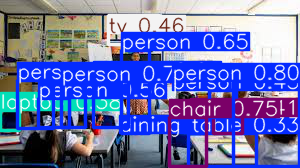

In [4]:
# Test on a sample image
img = Image.open("download.jpg")
results = model(img)
results.show()  # Display predictions

In [5]:
cap = cv2.VideoCapture(0)  # Initialize camera

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(rgb_frame)  # Perform detection
    
    # Render results on frame
    result_img = results.render()[0]  # YOLOv5 renders results directly
    result_bgr = cv2.cvtColor(result_img, cv2.COLOR_RGB2BGR)  # Convert back to BGR for OpenCV display

    # Display frame
    cv2.imshow("Real-Time Object Detection", result_bgr)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\comm

KeyboardInterrupt: 

In [1]:
from flask import Flask, render_template, Response
import cv2
import torch

app = Flask(__name__)

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # or yolov5m, yolov5l, yolov5x

def generate_frames():
    cap = cv2.VideoCapture(0)  # Initialize webcam
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = model(rgb_frame)  # Perform detection
        
        # Render results on frame
        result_img = results.render()[0]  # YOLOv5 renders results directly
        result_bgr = cv2.cvtColor(result_img, cv2.COLOR_RGB2BGR)  # Convert back to BGR
        
        # Encode frame to bytes for Flask response
        _, buffer = cv2.imencode('.jpg', result_bgr)
        frame_bytes = buffer.tobytes()
        
        # Yield the frame as part of a multipart response
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame_bytes + b'\r\n')
    
    cap.release()

@app.route('/')
def index():
    """Render the main page."""
    return render_template('index.html')

@app.route('/video_feed')
def video_feed():
    """Stream video feed."""
    return Response(generate_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == "__main__":
    app.run(debug=True)


Using cache found in C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-13 Python-3.12.4 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1